# GroupMe Data Scraping

## To download your GroupMe data, go to your GroupMe profile on the web version.  Click on "Export My Data", then "Create Export".  You can choose which groups and/or direct messages to export.  The data I used for information about likes is in the message.json file.

In [177]:
import pandas as pd

df = pd.read_json('message_physics_trauma.json')

df['like_num'] = df['favorited_by'].apply(len)
df.head()
name_pivtab = pd.pivot_table(df,index='sender_id',columns='name',aggfunc='count').fillna(0)

def get_max_name(s):
    if s in name_pivtab.T:
        return name_pivtab.T[s].idxmax()[1]
    else:
        return s
df['Name'] = df['sender_id'].apply(get_max_name)

df_likes = df.groupby('Name')['like_num'].agg('sum').sort_values(ascending = False)

df_likes = pd.DataFrame(df_likes)
df_likes

,like_num
Name,
Guillermo Suarez,522
Tau Neutrino Tommy,492
Dan Le,438
Dabiano Peruana,255
Nolan King,227
"Dwayne ""Dirac"" Johnson",215
Raj Patel,180
Austen Adams,155
DiPaul Moment,124


### Now that we have the number of likes received, we can figure out the number of likes given and compare them.

In [178]:
def get_max_name_list(l):
    l_new=list()
    for s in l:
        l_new.append(get_max_name(s))
    return l_new
df['liked_by_names'] = df['favorited_by'].apply(get_max_name_list)
df['liked_by_names']
liked_series = df[df['like_num']>0]
liked_series['liked_by_names']

id_name_dict = {}
for sender_id in df['sender_id'].unique():
    id_name_dict[sender_id] = get_max_name(sender_id)
    


In [179]:
df_likes_given = df.groupby('Name')['created_at'].agg('count')
df_likes_given = pd.DataFrame(df_likes_given)

def likes_given(s):
    return sum([1*(s in name) for name in liked_series['liked_by_names']])


df_likes_given['Name'] = df_likes_given.index.values
df_likes_given['likes_given'] = df_likes_given['Name'].apply(likes_given)
df_likes_given = df_likes_given.drop('Name',axis=1)


In [180]:
df_likes_proportion = pd.merge(df_likes_given,df_likes,left_on = 'Name',right_on = 'Name')
df_likes_proportion = df_likes_proportion.rename(columns = {'created_at':'messages','like_num':'likes'})
df_likes_proportion['likes_per_messages'] = df_likes_proportion['likes']/df_likes_proportion['messages']
df_likes_proportion['likes_per_messages'].sort_values(ascending=False)
df_likes_proportion['ratio_of_received_to_given'] = df_likes_proportion['likes']/df_likes_proportion['likes_given']
df_likes_proportion = df_likes_proportion.sort_values(by = 'likes', ascending = False)
df_likes_proportion

,messages,likes_given,likes,likes_per_messages,ratio_of_received_to_given
Name,,,,,
Guillermo Suarez,317,120,522,1.646688,4.350000
Tau Neutrino Tommy,313,509,492,1.571885,0.966601
Dan Le,561,201,438,0.780749,2.179104
Dabiano Peruana,146,122,255,1.746575,2.090164
Nolan King,135,89,227,1.681481,2.550562
"Dwayne ""Dirac"" Johnson",306,254,215,0.702614,0.846457
Raj Patel,256,166,180,0.703125,1.084337
Austen Adams,65,195,155,2.384615,0.794872
DiPaul Moment,124,401,124,1.000000,0.309227


### A quick scatterplot shows that the number of likes given and likes received tends to be positively correlated, indicating that group members that are active in the chat both like messages and have their messages liked.

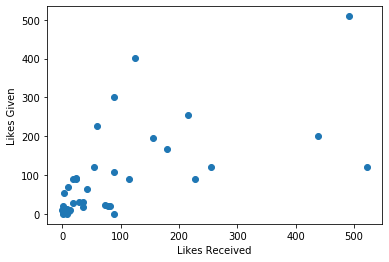

In [181]:
import matplotlib.pyplot as plt
plt.scatter(df_likes_proportion['likes'],df_likes_proportion['likes_given'])
plt.xlabel('Likes Received')
plt.ylabel('Likes Given')
plt.show()

### This code creates a "biggest fan" attribute, which determines who has liked the most of each person's messages.

In [182]:
import numpy as np
liked_df_group = liked_series.groupby('Name')

def get_likes_in_group(s, name):
    return sum([1*(name in group) for group in np.array(liked_df_group.get_group(s)['liked_by_names'])])
def get_favorites(s):
    if s in list(liked_series['Name']):
        liked_by_array = np.array(liked_df_group.get_group(s)['liked_by_names'])
        names_list = list()
        num_messages_liked = list()
        for name in df_likes_proportion.index.values:
            names_list.append(name)
            num_messages_liked.append(get_likes_in_group(s,name))
        index = pd.Series(num_messages_liked).idxmax()
        return (names_list[index], int(num_messages_liked[index]))
    else:
        return ''
df_likes_proportion['Name'] = df_likes_proportion.index.values
df_likes_proportion['biggest_fan'] = df_likes_proportion['Name'].apply(get_favorites)
df_likes_proportion = df_likes_proportion.drop('Name',axis=1)
df_likes_proportion


,messages,likes_given,likes,likes_per_messages,ratio_of_received_to_given,biggest_fan
Name,,,,,,
Guillermo Suarez,317,120,522,1.646688,4.350000,"(Tau Neutrino Tommy, 80)"
Tau Neutrino Tommy,313,509,492,1.571885,0.966601,"(DiPaul Moment, 78)"
Dan Le,561,201,438,0.780749,2.179104,"(DiPaul Moment, 71)"
Dabiano Peruana,146,122,255,1.746575,2.090164,"(Tau Neutrino Tommy, 43)"
Nolan King,135,89,227,1.681481,2.550562,"(Charm Quark Chels, 38)"
"Dwayne ""Dirac"" Johnson",306,254,215,0.702614,0.846457,"(Tau Neutrino Tommy, 42)"
Raj Patel,256,166,180,0.703125,1.084337,"(DiPaul Moment, 43)"
Austen Adams,65,195,155,2.384615,0.794872,"(Tau Neutrino Tommy, 19)"
DiPaul Moment,124,401,124,1.000000,0.309227,"(Tau Neutrino Tommy, 27)"
